# Spotify Analysis: Music Taste Between Now & Then

My boyfriend and I share a Spotify account to listen to music together, and we are always wonder how our music taste is actually like as we listened to many genres and kinds of music, and we have some change in our music option recently. Thus, I conducted this analysis to discover the tendency of our listening preference to understand our music taste better by comparing between the 2 playlists "On Repeat" and "Repeat Rewind".


**Analysis outline**:
1. Data Collection
 * Connect to API
 * Read data
2. Data Analysis
 * Statistics
 * Overall audio features analysis
 * Difference analysis
 * Diversity analysis
 * Correlation analysis
3. Conclusion


# 1. Data Collection

In order to read Spotify API, I need to apply for permissions & credentials through their Developer site. I then used Python to scrape the Spotify API web (that I learned from multiple articles in "Towards Data Science" to extract all songs from our "On Repeat" and "Repeat Rewind" playlist) and export to .csv file (for I don't want to public my account information). The code I used are on file "Spotify_API".

The initial data contains 20 columns with 30 songs from our playlists. However, it’s crucial to acknowledge that I didn’t use all 20 variables but only that highly related to the audio features - according to Spotify:

    - Mood: Danceability, Valence, Energy, Tempo
    - Properties: Loudness, Speechiness, Instrumentalness
    - Context: Liveness, Acousticness

 - **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

 - **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

 - **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

 - **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

 - **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

 - **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

 - **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

 - **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

 - **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [1]:
# Import essential packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline

In [2]:
# Read "On Repeat" playlist
on_repeat = pd.read_csv('on_repeat.csv')
print(on_repeat.head())

   Unnamed: 0   playlist                      id  \
0           0  on_repeat  0SQ1fQMTK2AAoW2rz4Im6f   
1           1  on_repeat  5ajjAnNRh8bxFvaVHzpPjh   
2           2  on_repeat  5EYBryPOgIEPB7r5QIy6eG   
3           3  on_repeat  43Ykum9T72UOPhBN31grpN   
4           4  on_repeat  5rFj8OzffT0iggSjcBaeND   

                                               album  \
0  Elephants...Teeth Sinking Into Heart (Standard...   
1                                           Reckless   
2                                       Shawn Mendes   
3                          evermore (deluxe version)   
4               Fire On Fire (From "Watership Down")   

                                   name            artist  explicit  \
0                         Over and Over  Rachael Yamagata     False   
1                              Reckless      Madison Beer     False   
2                    Fallin' All In You      Shawn Mendes     False   
3                                   ivy      Taylor Swift      Tru

In [3]:
# Read "Repeat Rewind" playlist
repeat_rewind=pd.read_csv('repeat_rewind.csv')
print(repeat_rewind.head())

   Unnamed: 0       playlist                      id  \
0           0  repeat_rewind  1gcyHQpBQ1lfXGdhZmWrHP   
1           1  repeat_rewind  2dUbpH1y32IQKGzc254W32   
2           2  repeat_rewind  5uRa4je68U6oSiPKTiX1MW   
3           3  repeat_rewind  21aZV2eL6Ek25yS5ISKD05   
4           4  repeat_rewind  52OkpDsU6MmPx1AwGOb6Ap   

                       album                name        artist  explicit  \
0  evermore (deluxe version)  champagne problems  Taylor Swift      True   
1          The Bright Lights   The Bright Lights    flora cash     False   
2              One Last Time       One Last Time            LP     False   
3                      Honey               Honey         CUTTS     False   
4  evermore (deluxe version)      cowboy like me  Taylor Swift      True   

   popularity  danceability  energy  ...  mode  speechiness  acousticness  \
0          66         0.462   0.240  ...     1       0.0377        0.9200   
1          35         0.661   0.388  ...     1      

In [4]:
on_repeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        30 non-null     int64  
 1   playlist          30 non-null     object 
 2   id                30 non-null     object 
 3   album             30 non-null     object 
 4   name              30 non-null     object 
 5   artist            30 non-null     object 
 6   explicit          30 non-null     bool   
 7   popularity        30 non-null     int64  
 8   danceability      30 non-null     float64
 9   energy            30 non-null     float64
 10  key               30 non-null     int64  
 11  loudness          30 non-null     float64
 12  mode              30 non-null     int64  
 13  speechiness       30 non-null     float64
 14  acousticness      30 non-null     float64
 15  instrumentalness  30 non-null     float64
 16  liveness          30 non-null     float64
 17 

In [5]:
repeat_rewind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        30 non-null     int64  
 1   playlist          30 non-null     object 
 2   id                30 non-null     object 
 3   album             30 non-null     object 
 4   name              30 non-null     object 
 5   artist            30 non-null     object 
 6   explicit          30 non-null     bool   
 7   popularity        30 non-null     int64  
 8   danceability      30 non-null     float64
 9   energy            30 non-null     float64
 10  key               30 non-null     int64  
 11  loudness          30 non-null     float64
 12  mode              30 non-null     int64  
 13  speechiness       30 non-null     float64
 14  acousticness      30 non-null     float64
 15  instrumentalness  30 non-null     float64
 16  liveness          30 non-null     float64
 17 

# 2. Data Analysis
## General Statistics

In [6]:
#mean values of audio features
on_repeat.groupby('playlist')['danceability', 'energy','loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'].mean()

<ipython-input-6-476b6acefc8c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  on_repeat.groupby('playlist')['danceability', 'energy','loudness', 'speechiness',


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
playlist,,,,,,,,,
on_repeat,0.464867,0.394167,-9.668933,0.042407,0.703347,0.054972,0.16812,0.284733,114.983367


In [7]:
repeat_rewind.groupby('playlist')['danceability', 'energy','loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'].mean()

<ipython-input-7-a276c6df6676>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  repeat_rewind.groupby('playlist')['danceability', 'energy','loudness', 'speechiness',


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
playlist,,,,,,,,,
repeat_rewind,0.581,0.51402,-9.045533,0.077053,0.55736,0.06648,0.137093,0.364353,124.226


For the purpuse of our analysis, we will only select a few variables that is highly related to audio features, including: danceability, energy, speechiness, acousticness, instrumentalness, liveness, and valence.

In [8]:
on_repeat_features = on_repeat[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']]

In [9]:
repeat_rewind_features = repeat_rewind[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']]

# Overall audio features analysis
Now we will look at the mean of the 2 playlist in a bar chart and a radar chart:

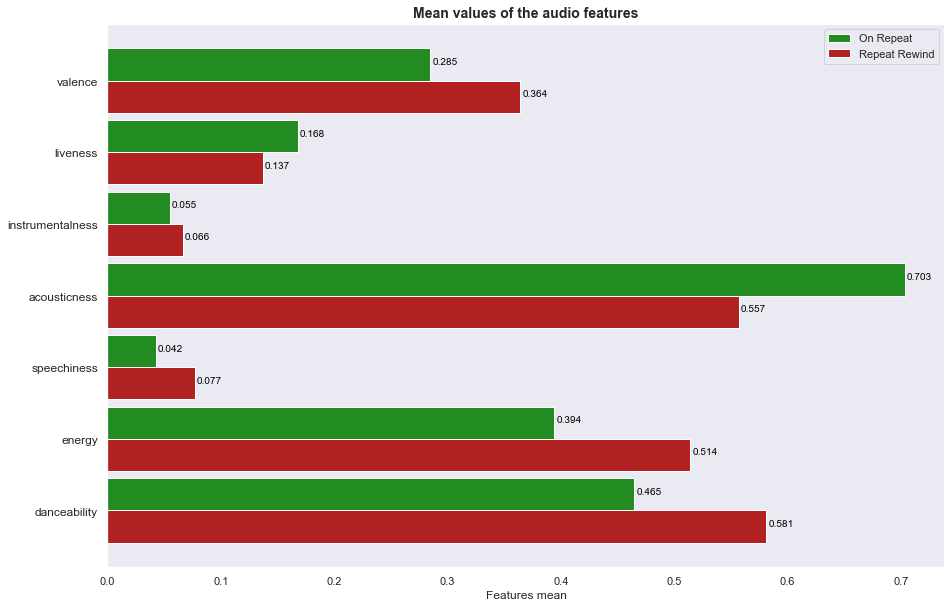

In [10]:
sns.set(rc={'figure.figsize':(15,10)})

#length of On Repeat features
n = len(on_repeat_features.mean())

#list of features
index = np.arange(n)

#bar plot with On Repeat list
plt.barh(index, on_repeat_features.mean(), 0.45, label = 'On Repeat', color = 'forestgreen')

y = round(on_repeat_features.mean(), 3)
for i, v in enumerate(y):
    plt.text(v + 0.002, i, str(v), color='black', fontweight='light', fontsize=10)

#bar plot with Repeat Rewind list
plt.barh(index - 0.45, repeat_rewind_features.mean(), 0.45, label='Repeat Rewind', color = 'firebrick')

x = round(repeat_rewind_features.mean(), 3)
for i, v in enumerate(x):
    plt.text(v + 0.002, i - 0.45, str(v), color='black', fontweight='light', fontsize=10)
#x-label
plt.xlabel('Features mean', fontsize=12)

#y-label
plt.yticks(index - 0.47 / 2, (list(repeat_rewind_features)[:]), fontsize = 12)

#title
plt.title('Mean values of the audio features', fontsize=14, fontweight='bold')

#legend
plt.legend(loc='best')

#set style
style.use('ggplot')
plt.grid(False)

plt.show()

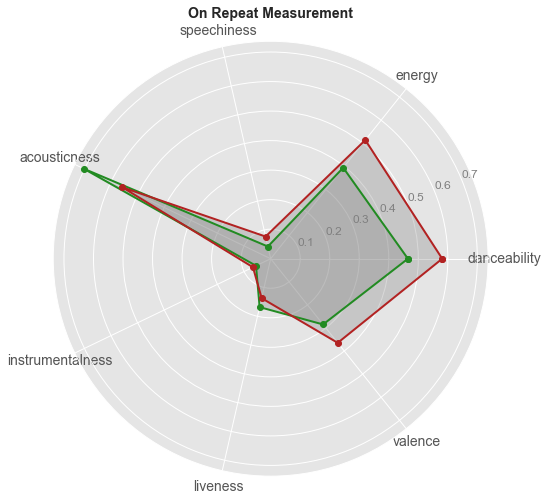

In [11]:
# plot size
fig=plt.figure(figsize=(8,8))

# convert column names into a list
categories_onrepeat=list(on_repeat_features.columns)
categories_repeatrewind = list(repeat_rewind_features.columns)

# number of categories
N=len(categories_onrepeat)
N2=len(categories_repeatrewind)

# create a list with the average of all features
value=list(on_repeat_features.mean())
value2=list(repeat_rewind_features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
value2+=value2[:1]

# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value, color='forestgreen',linewidth=2, marker='o')
plt.polar(angles, value2, color='firebrick',linewidth=2, marker='o')
plt.fill(angles,value,alpha=0.3, color='grey')
plt.fill(angles,value2,alpha=0.3, color='grey')

# plt.title('On Repeat Measurement', size 14)

plt.xticks(angles[:-1], categories_onrepeat, size=14)
plt.yticks(color='grey',size=12)
plt.title('On Repeat Measurement', fontweight='bold', size=14)
style.use('ggplot')

plt.show()

From the analysis and the chart above, we can see that our current music taste is obviously more accoustic and lively, while less in danceability, energy, valence and speechiness. This fact indicates that we are turning to songs that are softer, more gentle and melodical, somehow can be less cheerful, more melancholy and morose. We used to listened to songs that have higher, louder and more exciting beat. The significant decrease in "valence", "danceability", and "energy" is a proof for this fact.

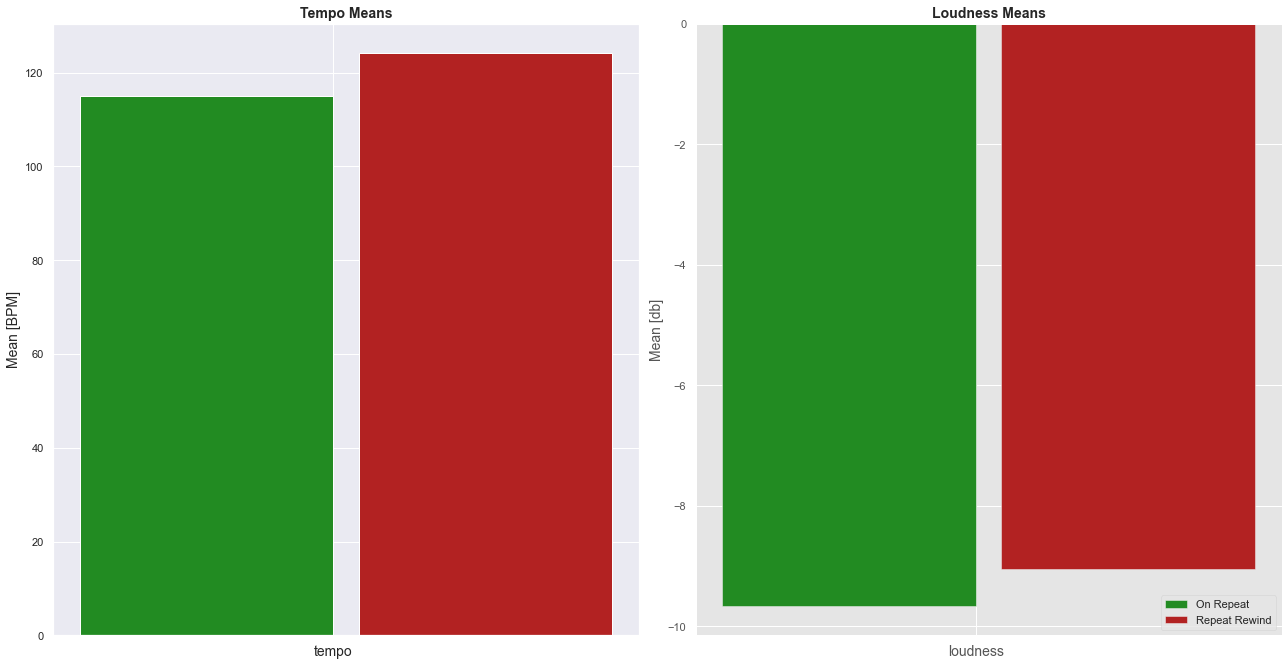

In [12]:
# tempo chart
tempo_on_repeat = on_repeat[['tempo']]
tempo_repeat_rewind = repeat_rewind[['tempo']]

sns.set(rc={'figure.figsize':(18,18)})
N = len(tempo_on_repeat.mean())
ind = np.arange(N) 
plt.subplot(221)
width = 0.5     

plt.bar(ind, tempo_on_repeat.mean() , width, label='On Repeat', color = 'forestgreen')
plt.bar(ind + 1.1*width, tempo_repeat_rewind.mean(), width, label='Repeat Rewind', color = 'firebrick')


plt.ylabel('Mean [BPM]', fontsize = 14)
plt.title('Tempo Means', fontsize = 14, fontweight='bold')
plt.xticks(ind + width / 2, (list(tempo_on_repeat)[:]), fontsize = 14)
style.use("ggplot")

#loudness chart
plt.subplot(222)

loud_on_repeat = on_repeat[['loudness']]
loud_repeat_rewind = repeat_rewind[['loudness']]

N = len(loud_on_repeat.mean())

ind = np.arange(N) 

width = 0.5  
plt.bar(ind, loud_on_repeat.mean() , width, label='On Repeat', color = 'forestgreen')
plt.bar(ind + 1.1*width, loud_repeat_rewind.mean(), width, label='Repeat Rewind', color = 'firebrick')

plt.ylabel('Mean [db]', fontsize = 14)
plt.title('Loudness Means', fontsize=14, fontweight='bold')


plt.xticks(ind + width / 2, (list(loud_on_repeat)[:]), fontsize = 14)
plt.legend(loc='lower right')
style.use("ggplot")

plt.tight_layout()
plt.show()

From the bar chart, it is obvious that we are turning to songs that have less in speed and loudness. We tend to prefer softer song, which is more likely to be love ballads or soft pop.

## Difference Analysis

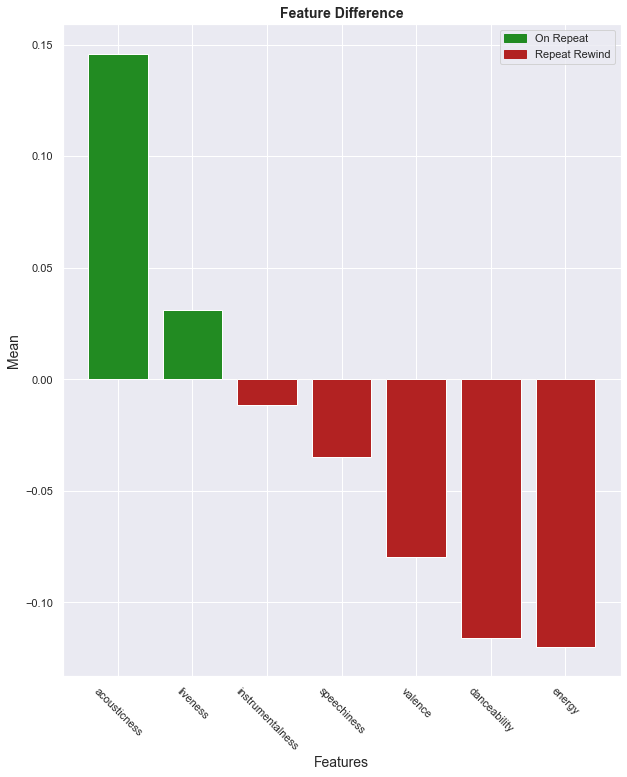

In [18]:
colors = ['forestgreen','forestgreen','firebrick','firebrick','firebrick','firebrick', 'firebrick']
dif_features = on_repeat_features.mean() - repeat_rewind_features.mean()

index = dif_features.sort_values(ascending = False).index
sns.set(rc={'figure.figsize':(10,12)})
#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)

plt.bar(x,y, color=colors)
plt.xticks(x, (on_repeat_features.columns))
ax.set_xticklabels(index, rotation=-45)

#Create Legend
import matplotlib.patches as mpatches
forestgreen_patch = mpatches.Patch(color ='forestgreen', label = 'On Repeat')
firebrick_patch = mpatches.Patch(color = 'firebrick', label = 'Repeat Rewind')
plt.legend(handles = [forestgreen_patch, firebrick_patch], loc = 'upper right')


#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.title('Feature Difference', fontsize=14, fontweight='bold')
plt.show()

The difference emphasizes that songs in "On Repeat" are higher in acousticness and liveness, while songs in "Repeat Rewind" are much more energetic, danceable, valent, and have higher level of speechiness and instrumentalness. We seem really intrigued in soft and melancholy tracks recently!

## Diversity analysis

In [14]:
on_repeat_features.std().mean()

0.14826347939289586

In [15]:
repeat_rewind_features.std().mean()

0.1787080688778234

We can see that our current music taste is slightly less diversed than ours in the past. 

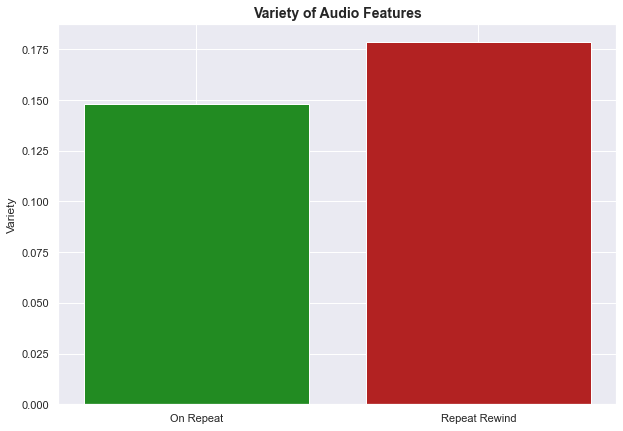

In [23]:
sns.set(rc={'figure.figsize':(10,7)})

data = [on_repeat_features.std().mean(), repeat_rewind_features.std().mean()]
names = ('On Repeat','Repeat Rewind')
colors = ['forestgreen','firebrick']
pos = np.arange(len(names))

plt.bar(pos, data, align = 'center', color = colors)
plt.xticks(pos, names)
plt.ylabel('Variety')
plt.title('Variety of Audio Features', fontsize=14, fontweight='bold')
style.use('ggplot')
plt.show()


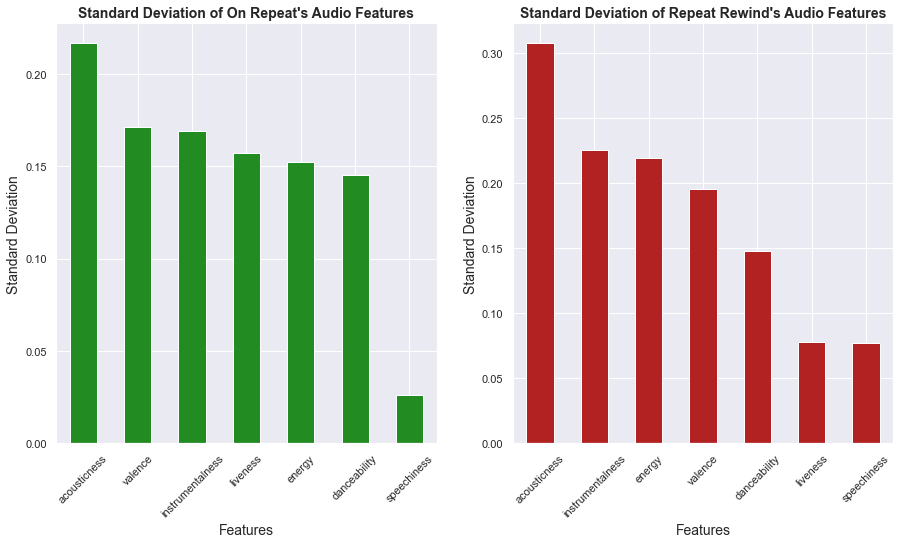

In [21]:
sns.set(rc={'figure.figsize':(15,17)})
plt.subplot(221)
on_repeat_features.std().sort_values(ascending= False).plot(kind = 'bar', color = 'forestgreen')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of On Repeat's Audio Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(222)
repeat_rewind_features.std().sort_values(ascending= False).plot(kind = 'bar', color = 'firebrick')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Repeat Rewind's Audio Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

We used to listened to a more diverse variety of songs than we currently do. Besides, there is also different in the diversity amount among features. The acousticness, valence, liveness variable are more diverse in "On Repeat" than "Repeat Rewind".

## Correlation analysis

### Correlation plot

In [24]:
both_feature = on_repeat.append(repeat_rewind)

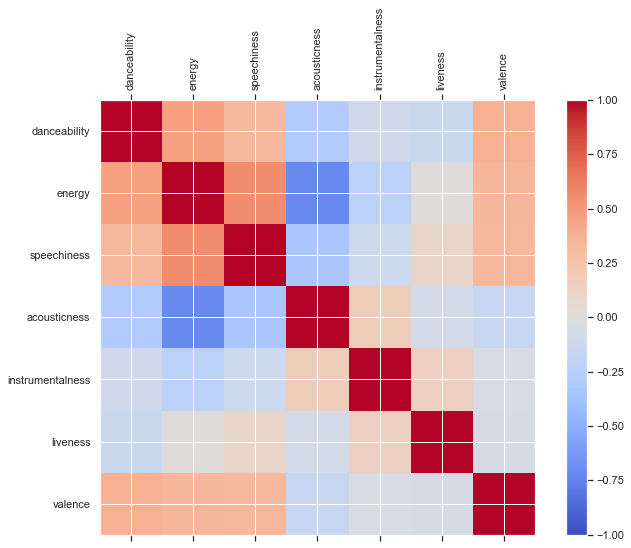

In [25]:
sns.set(rc={'figure.figsize':(11,8)})


#app usage variables
X = both_feature[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']]

#correlation for variables in X
corr = X.corr()

#Plot the correlation
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

### Valence and Energy

In [26]:
from sklearn import metrics
import statsmodels.api as sm

#construct the OLS model
X =  both_feature['valence']
y = both_feature['energy']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              175.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                    2.48e-19
Time:                        18:01:33   Log-Likelihood:                         -1.4527
No. Observations:                  60   AIC:                                      4.905
Df Residuals:                      59   BIC:                                      7.000
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
valence        1.1447      0.086     13.248      0.000       0.972       1.318
==============================================================================
Omnibus:                        3.215   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.007
Skew:                           0.005   Prob(JB):                        0.222
Kurtosis:                       4.097   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

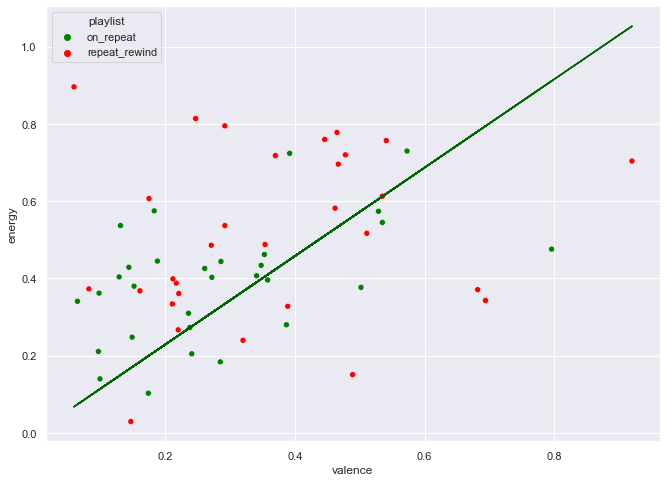

In [27]:
sns.set(rc={'figure.figsize':(11,8)})
pallette_use = ['green','red']
sns.scatterplot(x="valence", y="energy", hue="playlist",palette=pallette_use,
                     data=both_feature)
plt.plot(X, predictions, color='darkgreen')

### Valence and Danceability

In [28]:
from sklearn import metrics
import statsmodels.api as sm

#construct the OLS model
X =  both_feature['valence']
y = both_feature['danceability']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           danceability   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              217.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                    1.96e-21
Time:                        18:01:37   Log-Likelihood:                         -2.4789
No. Observations:                  60   AIC:                                      6.958
Df Residuals:                      59   BIC:                                      9.052
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
valence        1.2951      0.088     14.736      0.000       1.119       1.471
==============================================================================
Omnibus:                        2.981   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.148
Skew:                          -0.293   Prob(JB):                        0.342
Kurtosis:                       3.718   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

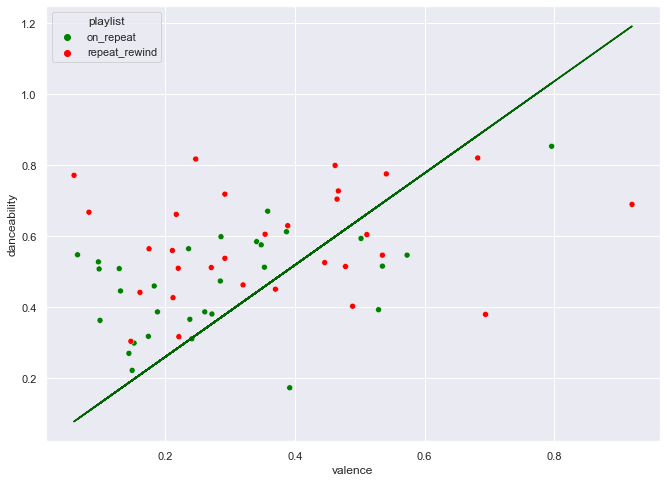

In [29]:
sns.set(rc={'figure.figsize':(11,8)})
pallette_use = ['green','red']
sns.scatterplot(x="valence", y="danceability", hue="playlist",palette=pallette_use,
                     data=both_feature)
plt.plot(X, predictions, color='darkgreen')

Similarly, the correlation between "valence" and "danceability" is not really clear (as R-squared accounts for only ~79%). Regardless of the valence measurement, the danceability variables mostly range from 0.4 to 0.5. While it's obvious that the danceability in "Repeat Rewind" is significantly higher than in "On Repeat".

# 3. Conclusion

This is a fun analysis to conduct to understand how the music taste of me and my boyfriend changes between now and then, quite a good couple's enhance-the-understanding activity. I have read many analysis and articles on similar topics on Github and Towards Data Science and can learn so much from them to conduct my very first project. From this analysis, I can have better understand in our music preference, and can see how our music taste alters for real. Thus, I can find it easier to find a suitable playlist to listen to instead of browsing on our lists of playlist wondering which is exactly the one into my mood right now.